<a href="https://colab.research.google.com/github/andresvc21/Random_Practice_ML/blob/main/Wines_Classification_Homework_M1_Andres_Villegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRO 

Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [49]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2022-01-25 02:42:56--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv.1’

wines.csv.1         100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-01-25 02:42:56 (68.1 MB/s) - ‘wines.csv.1’ saved [10957/10957]



In [50]:
import pandas as pd
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Data Exploration

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

No null values. Good!


In [52]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


I deal with with difference between min and max later

In [53]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

It seems that there is not a great imbalance of my wine classes, with the amount of data (178) it does not seem to be a problem to consider


Lets do a first analayis only using the alcohol for each one of the classes


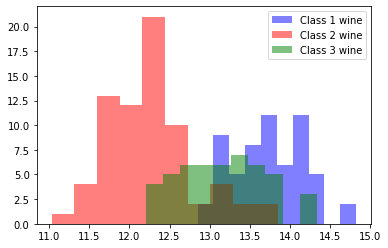

In [54]:
import matplotlib.pyplot as plt

alcohol=df['Alcohol']



plt.hist(alcohol[df['Class']==1], 10, facecolor='blue', alpha=0.5, label="Class 1 wine")
plt.hist(alcohol[df['Class']==2], 10, facecolor='red', alpha=0.5, label="Class 2 wine")
plt.hist(alcohol[df['Class']==3], 10, facecolor='green', alpha=0.5, label="Class 3 wine")

plt.legend()
plt.show()

There seems to be a difference. I could use a pairwayse plot to get more relevant information

<Figure size 800x640 with 0 Axes>

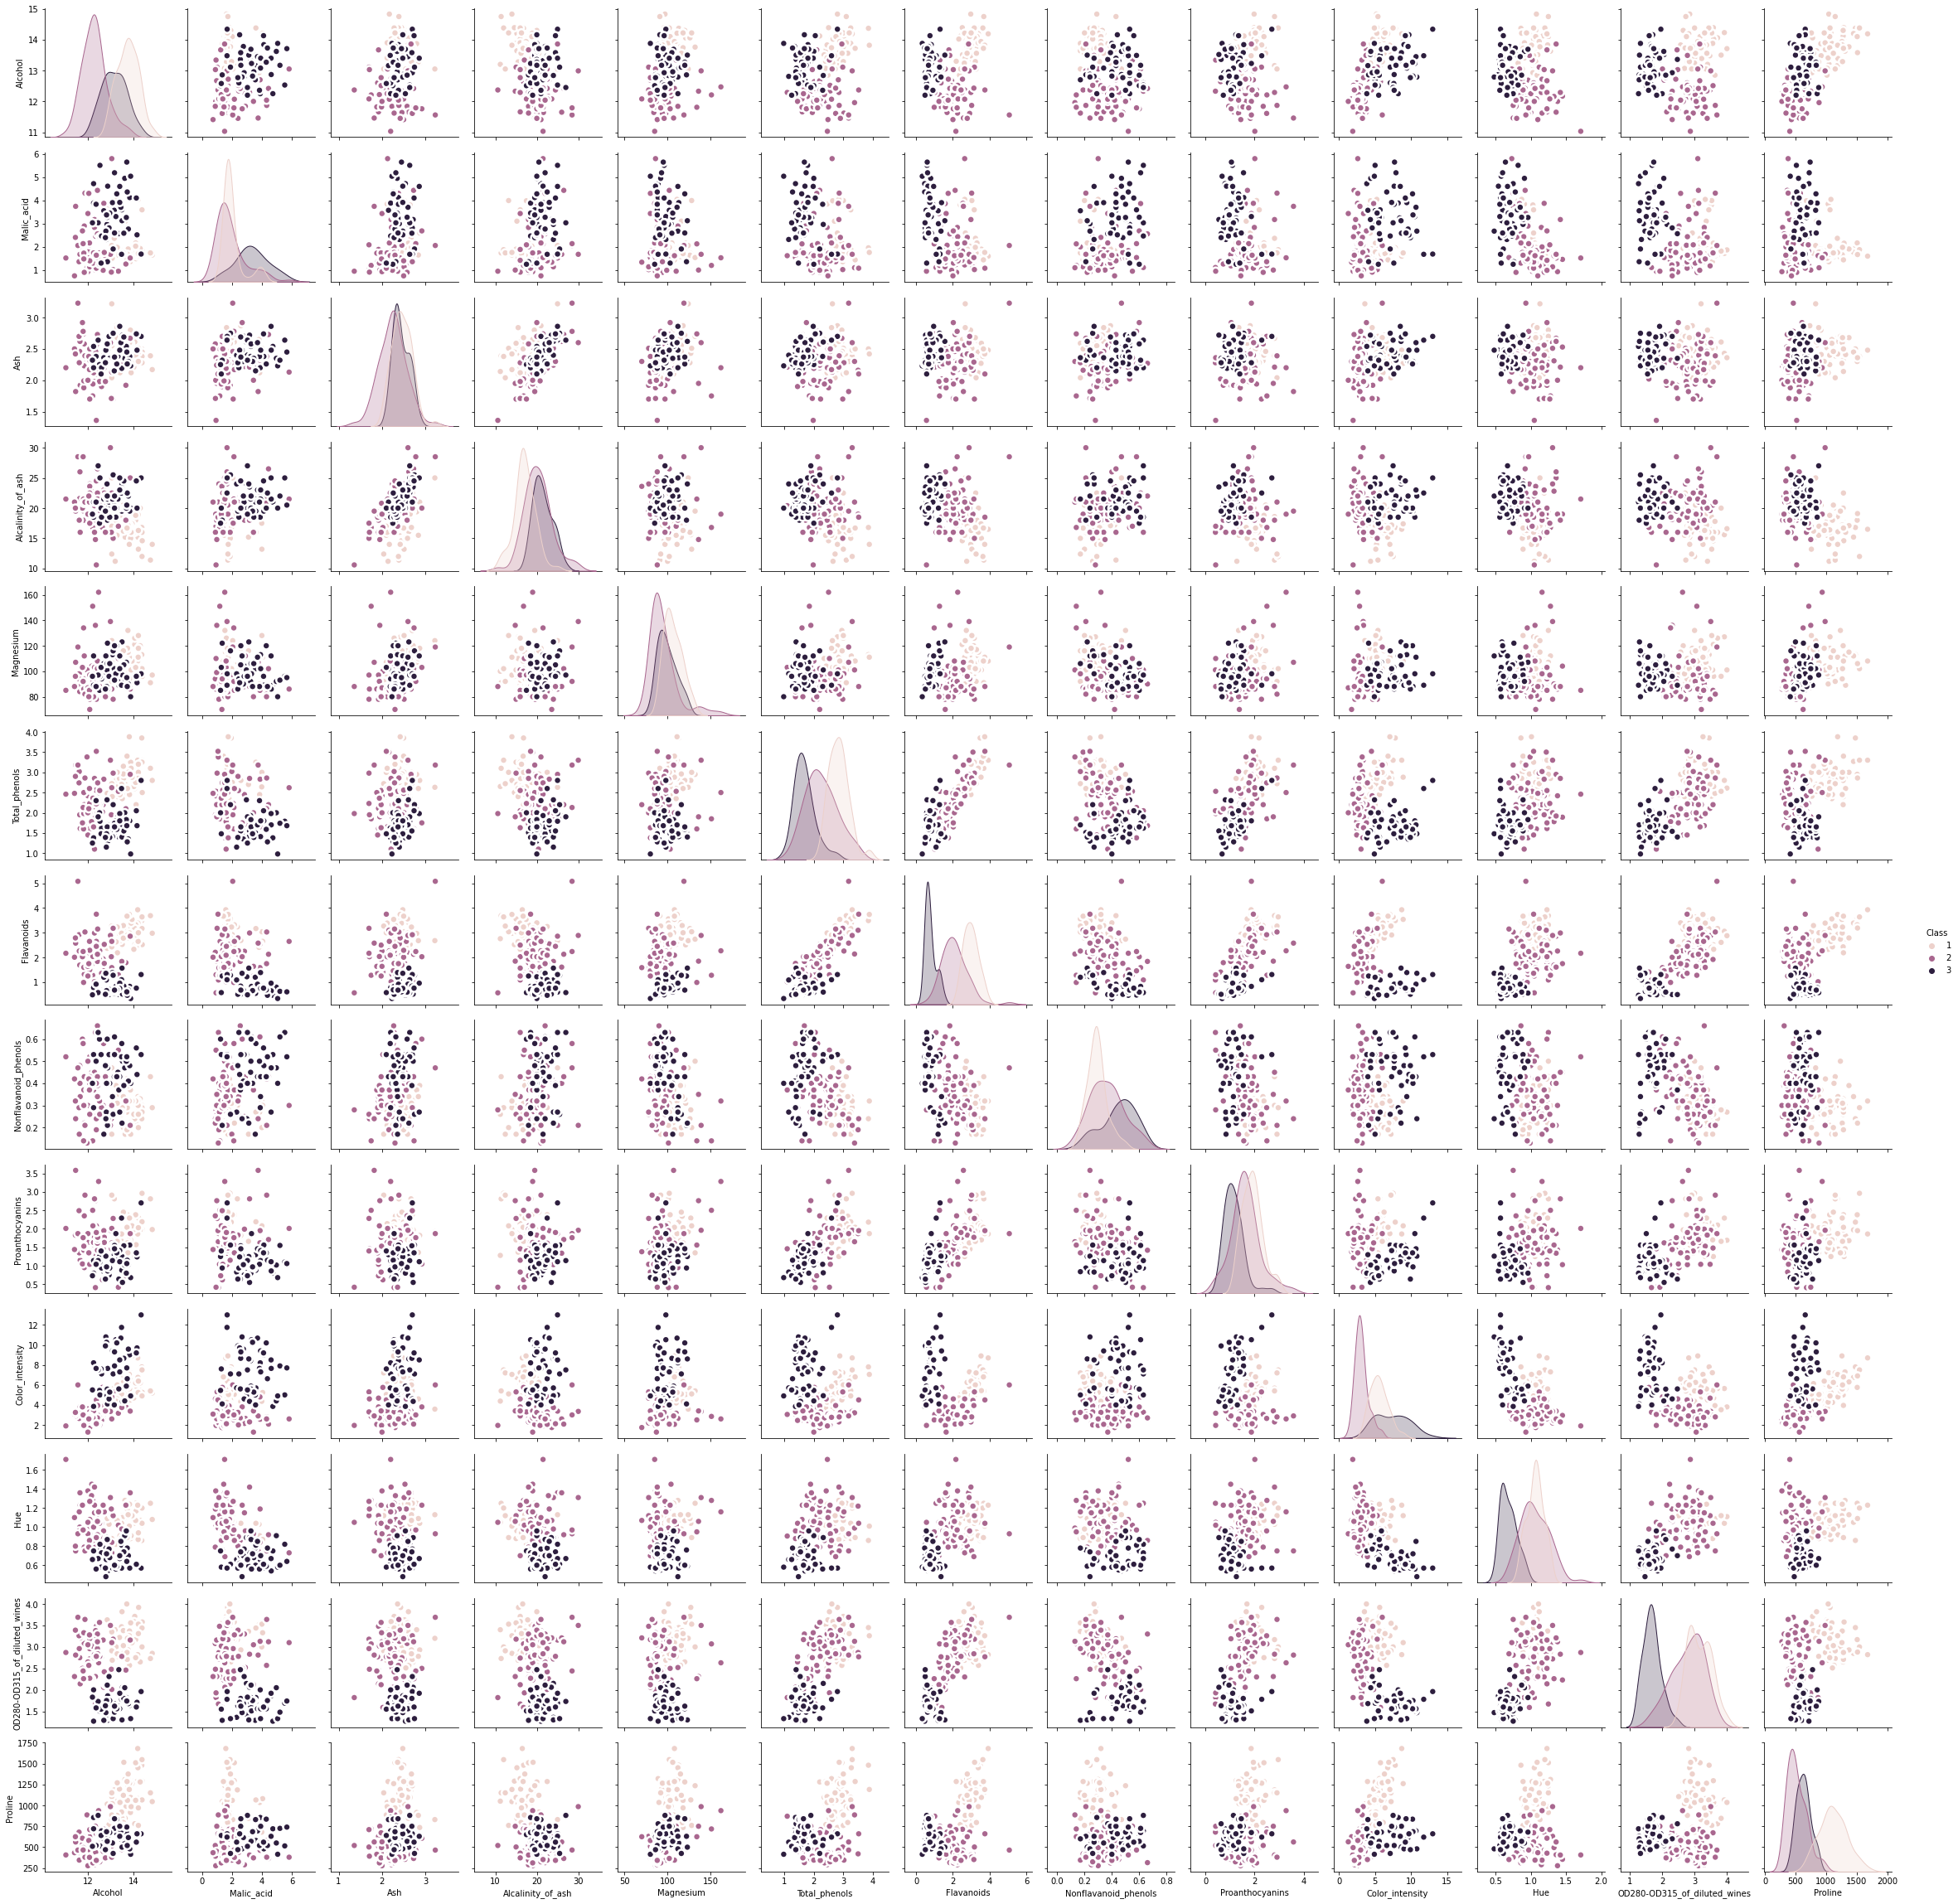

In [55]:
import seaborn as sns

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Even if we see an overlap in some features we are able to differentiate the three groups.


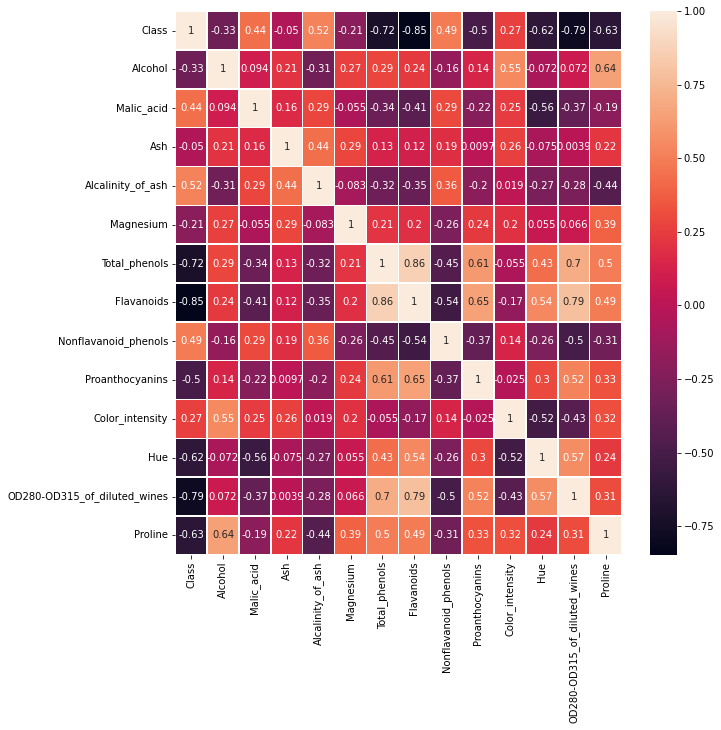

In [56]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            linewidths=.5)
plt.show()

From here we can see that Total_phenols, alchalinity of ash, flavonids, hue, dilucted_wines and proline are highle related

##Split Data and Hoy Encoding


In [57]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Specify the data 
X = df.iloc[:,1:14].values
print(X.shape)


# Specify the target labels and flatten the array 
y=df.iloc[:,0:1].values
print(y.shape)
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(178, 13)
(178, 1)


##Standarization

In [58]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

##NN Model

In [86]:
import numpy as np

np.random.seed(42) #for reproducibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

#NN with input 13 (as the shape of X) and two hidden layers, one of 12 and other one of 6 neurons

model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Compile with categrorcial_crossentropy bcs hotencoding
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

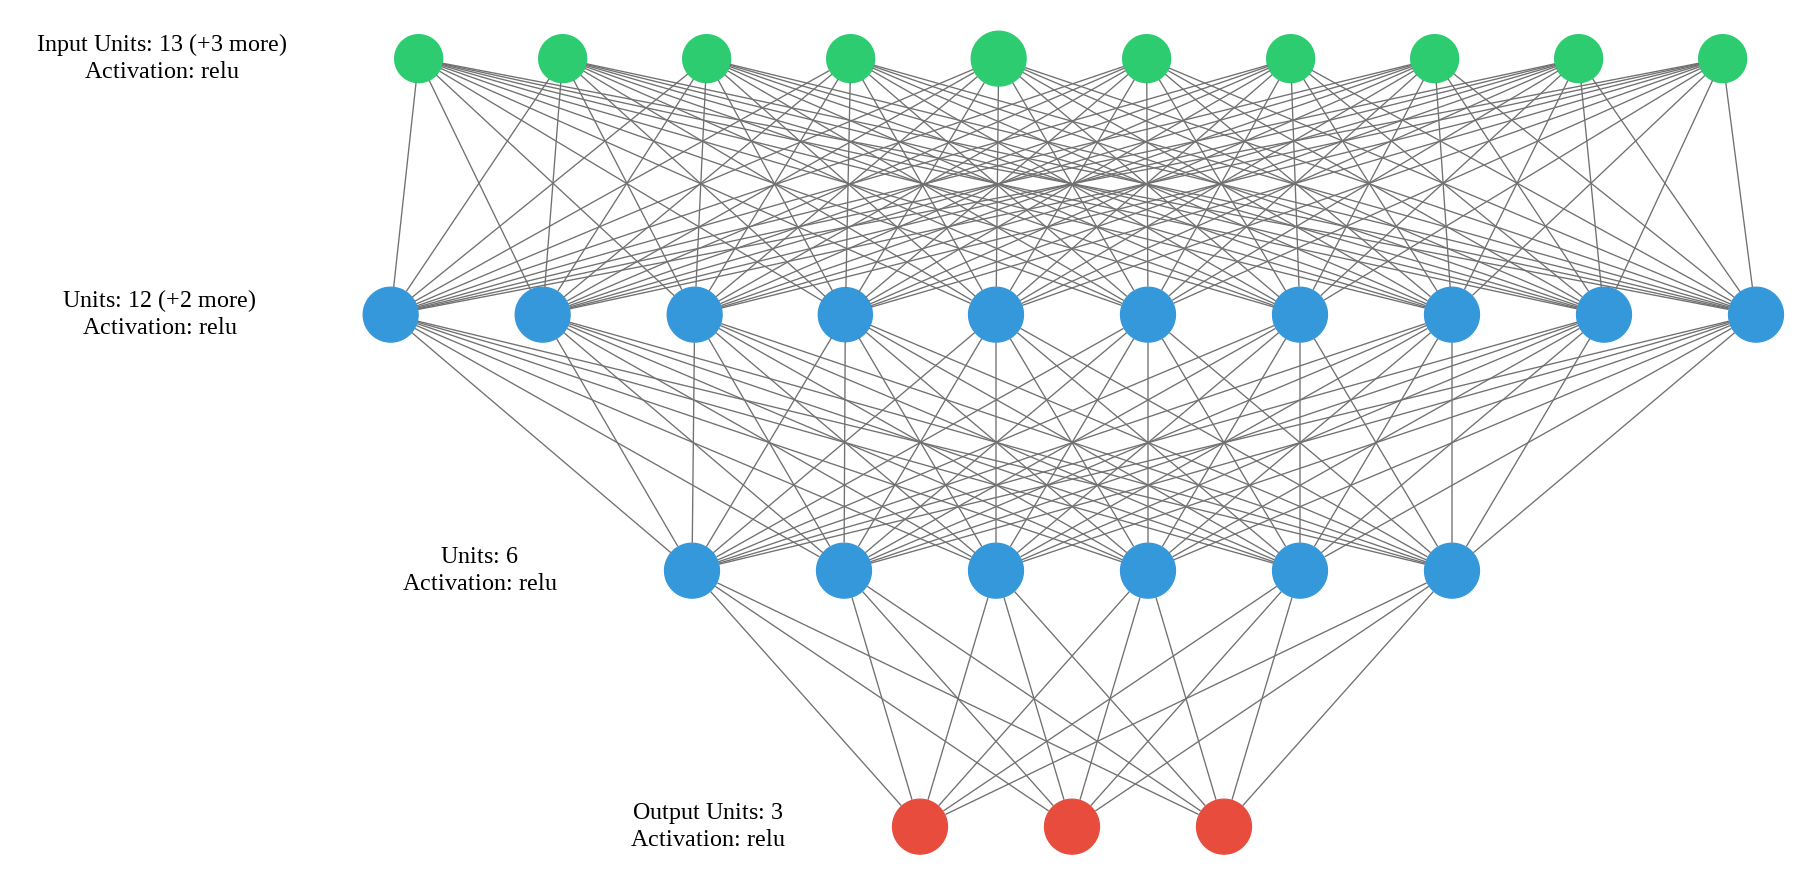

In [97]:
!pip3 install keras-visualizer
from keras_visualizer import visualizer 

visualizer(model, format='png', view=True)

from IPython.display import Image

Image("graph.png", width=100, height=100)
Image('graph.png')

In [87]:
#no need of batch size, data too small
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 49ms/step - loss: 1.2757 - accuracy: 0.1690 - val_loss: 1.1854 - val_accuracy: 0.1389
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 1.2226 - accuracy: 0.1901 - val_loss: 1.1452 - val_accuracy: 0.1667
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 1.1800 - accuracy: 0.1972 - val_loss: 1.1116 - val_accuracy: 0.1944
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 1.1418 - accuracy: 0.2254 - val_loss: 1.0844 - val_accuracy: 0.2500
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 1.1077 - accuracy: 0.2746 - val_loss: 1.0607 - val_accuracy: 0.2778
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 1.0801 - accuracy: 0.3169 - val_loss: 1.0384 - val_accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 1.0563 - accuracy: 0.3592 - val_loss: 1.0198 - val_accuracy: 0.4444
Epoch 8/200
5/5 [======

The training accuracy  reached 97.89 % so our model is trained. However lets see some metrics

##Check Model Performance

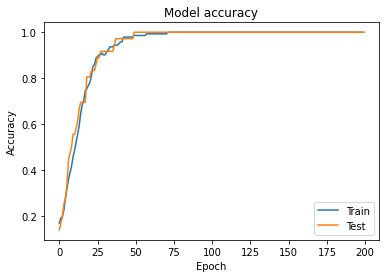

In [92]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

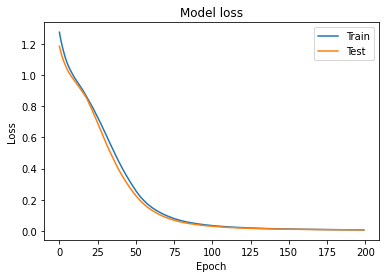

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()